# Airbnb in Vienna

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import os
import folium

<table>
<thead>
<tr>
<th>Column name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>realSum</strong></td>
<td>The total price of the Airbnb listing. (Numeric)</td>
</tr>
<tr>
<td><strong>room_type</strong></td>
<td>The type of room being offered (e.g. private, shared, etc.). (Categorical)</td>
</tr>
<tr>
<td><strong>room_shared</strong></td>
<td>Whether the room is shared or not. (Boolean)</td>
</tr>
<tr>
<td><strong>room_private</strong></td>
<td>Whether the room is private or not. (Boolean)</td>
</tr>
<tr>
<td><strong>person_capacity</strong></td>
<td>The maximum number of people that can stay in the room. (Numeric)</td>
</tr>
<tr>
<td><strong>host_is_superhost</strong></td>
<td>Whether the host is a superhost or not. (Boolean)</td>
</tr>
<tr>
<td><strong>multi</strong></td>
<td>Whether the listing is for multiple rooms or not. (Boolean)</td>
</tr>
<tr>
<td><strong>biz</strong></td>
<td>Whether the listing is for business purposes or not. (Boolean)</td>
</tr>
<tr>
<td><strong>cleanliness_rating</strong></td>
<td>The cleanliness rating of the listing. (Numeric)</td>
</tr>
<tr>
<td><strong>guest_satisfaction_overall</strong></td>
<td>The overall guest satisfaction rating of the listing. (Numeric)</td>
</tr>
<tr>
<td><strong>bedrooms</strong></td>
<td>The number of bedrooms in the listing. (Numeric)</td>
</tr>
<tr>
<td><strong>dist</strong></td>
<td>The distance from the city centre. (Numeric)</td>
</tr>
<tr>
<td><strong>metro_dist</strong></td>
<td>The distance from the nearest metro station. (Numeric)</td>
</tr>
<tr>
<td><strong>lng</strong></td>
<td>The longitude of the listing. (Numeric)</td>
</tr>
<tr>
<td><strong>lat</strong></td>
<td>The latitude of the listing. (Numeric)</td>
</tr>
</tbody>
</table>

[Source](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities/data)

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'amsterdam_weekdays.csv',
 'amsterdam_weekends.csv',
 'athens_weekdays.csv',
 'athens_weekends.csv',
 'barcelona_weekdays.csv',
 'barcelona_weekends.csv',
 'berlin_weekdays.csv',
 'berlin_weekends.csv',
 'budapest_weekdays.csv',
 'budapest_weekends.csv',
 'lisbon_weekdays.csv',
 'lisbon_weekends.csv',
 'london_weekdays.csv',
 'london_weekends.csv',
 'paris_weekdays.csv',
 'paris_weekends.csv',
 'rome_weekdays.csv',
 'rome_weekends.csv',
 'Untitled.ipynb',
 'vienna_weekdays.csv',
 'vienna_weekends.csv']

In [4]:
vienaWD = pd.read_csv("./vienna_weekends.csv")
vienaWS = pd.read_csv("./vienna_weekdays.csv")

In [29]:
vienaWD.drop("Unnamed: 0", axis=1, inplace=True)

In [30]:
vienaWD.head(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,324.661665,Entire home/apt,False,False,4.0,True,0,1,10.0,94.0,2,3.240613,0.610450,92.473467,6.622340,129.862880,3.138736,16.33006,48.20921
1,150.760816,Entire home/apt,False,False,2.0,True,0,1,10.0,96.0,1,2.241126,1.119505,124.258002,8.898538,154.350322,3.730588,16.38867,48.19104
2,196.339668,Entire home/apt,False,False,3.0,True,0,1,9.0,91.0,1,2.371551,0.452419,125.413127,8.981261,206.642494,4.994469,16.34236,48.20436
3,107.753079,Private room,False,True,2.0,False,0,0,8.0,92.0,1,3.629114,0.473164,62.459416,4.472931,93.810714,2.267369,16.37837,48.24102
4,196.339668,Entire home/apt,False,False,4.0,True,0,1,9.0,94.0,1,2.395063,0.443635,124.020359,8.881520,202.318070,4.889950,16.34198,48.20456


In [6]:
vienaWD.tail()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1794,1794,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136
1795,1795,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296
1796,1796,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460
1797,1797,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200
1798,1798,133.230489,Private room,False,True,4.0,True,1,0,10.0,93.0,1,1.263932,0.480903,150.450381,10.774264,225.247293,5.444140,16.39066,48.20811


In [9]:
vienaWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1799 non-null   int64  
 1   realSum                     1799 non-null   float64
 2   room_type                   1799 non-null   object 
 3   room_shared                 1799 non-null   bool   
 4   room_private                1799 non-null   bool   
 5   person_capacity             1799 non-null   float64
 6   host_is_superhost           1799 non-null   bool   
 7   multi                       1799 non-null   int64  
 8   biz                         1799 non-null   int64  
 9   cleanliness_rating          1799 non-null   float64
 10  guest_satisfaction_overall  1799 non-null   float64
 11  bedrooms                    1799 non-null   int64  
 12  dist                        1799 non-null   float64
 13  metro_dist                  1799 

In [10]:
vienaWD["realSum"]

0       324.661665
1       150.760816
2       196.339668
3       107.753079
4       196.339668
           ...    
1794    715.938574
1795    304.793960
1796    637.168969
1797    301.054157
1798    133.230489
Name: realSum, Length: 1799, dtype: float64

In [14]:
vienaWD.realSum.median()

212.00009349507985

In [15]:
vienaWD.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,899.000000,242.739524,3.370762,0.275709,0.344080,9.471929,93.667037,1.107838,3.137264,0.517147,121.656859,8.712261,175.366139,4.238532,16.361666,48.204160
std,519.470885,333.973791,1.293799,0.446995,0.475199,0.856284,7.340501,0.613656,1.939548,0.507592,87.601218,6.273421,151.877329,3.670816,0.036973,0.020178
min,0.000000,63.576654,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.039814,0.008374,19.378546,1.387764,26.509371,0.640721,16.213000,48.126000
25%,449.500000,165.135685,2.000000,0.000000,0.000000,9.000000,91.000000,1.000000,1.902712,0.237403,80.386874,5.756778,103.399770,2.499133,16.338000,48.190990
50%,899.000000,212.000093,3.000000,0.000000,0.000000,10.000000,96.000000,1.000000,2.760127,0.372334,104.017278,7.449031,142.040994,3.433076,16.359710,48.204160
75%,1348.500000,280.017764,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,3.934325,0.611564,135.260187,9.686442,208.013808,5.027613,16.382515,48.218000
max,1798.000000,13656.358834,6.000000,1.000000,1.000000,10.000000,100.000000,4.000000,13.339670,5.238375,1396.386675,100.000000,4137.426410,100.000000,16.546720,48.294600


<AxesSubplot:>

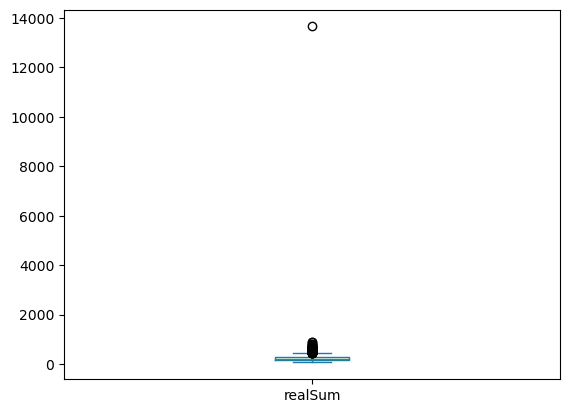

In [19]:
vienaWD.realSum.plot(kind="box")

In [20]:
vienaWD.realSum.max()

13656.358834116356

In [26]:
vienaWD[vienaWD.realSum > 6000]

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
879,879,13656.358834,Private room,False,True,2.0,False,0,0,9.0,87.0,1,2.239486,0.414409,128.349821,9.191567,201.546533,4.871302,16.34356,48.20751


In [27]:
vienaWD.drop(879, axis=0, inplace=True)

<AxesSubplot:ylabel='Frequency'>

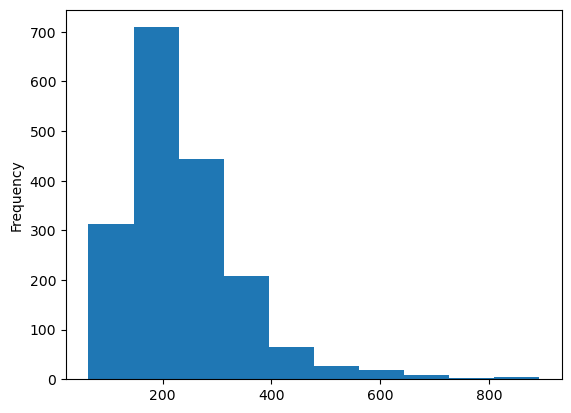

In [40]:
vienaWD.realSum.plot(kind="hist")

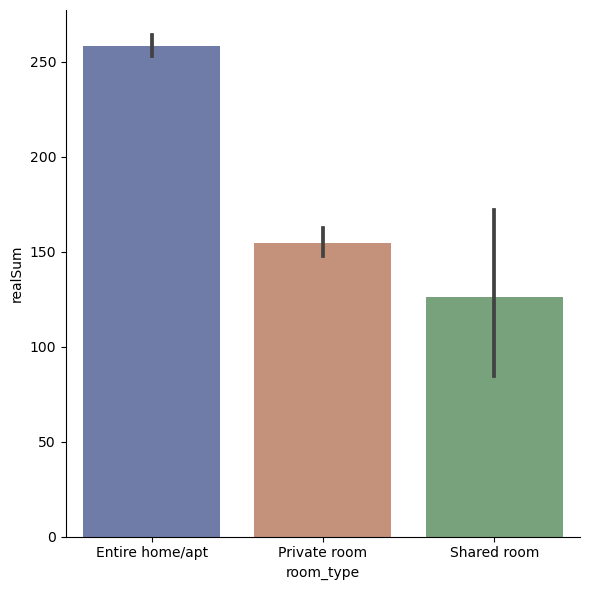

In [38]:
g = sns.catplot(
    data=vienaWD, kind="bar",
    x="room_type", y="realSum", palette="dark", alpha=.6, height=6
)
#g.despine(left=True)
#g.set_axis_labels("", "Body mass (g)")
#g.legend.set_title("")

In [39]:
vienaWD.room_type.value_counts()

Entire home/apt    1398
Private room        391
Shared room           9
Name: room_type, dtype: int64

In [44]:
geometry = gpd.points_from_xy(vienaWD.lng, vienaWD.lat)

In [46]:
geo_vienaWD = gpd.GeoDataFrame(vienaWD, geometry=geometry)
geo_vienaWD.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,geometry
0,324.661665,Entire home/apt,False,False,4.0,True,0,1,10.0,94.0,2,3.240613,0.610450,92.473467,6.622340,129.862880,3.138736,16.33006,48.20921,POINT (16.33006 48.20921)
1,150.760816,Entire home/apt,False,False,2.0,True,0,1,10.0,96.0,1,2.241126,1.119505,124.258002,8.898538,154.350322,3.730588,16.38867,48.19104,POINT (16.38867 48.19104)
2,196.339668,Entire home/apt,False,False,3.0,True,0,1,9.0,91.0,1,2.371551,0.452419,125.413127,8.981261,206.642494,4.994469,16.34236,48.20436,POINT (16.34236 48.20436)
3,107.753079,Private room,False,True,2.0,False,0,0,8.0,92.0,1,3.629114,0.473164,62.459416,4.472931,93.810714,2.267369,16.37837,48.24102,POINT (16.37837 48.24102)
4,196.339668,Entire home/apt,False,False,4.0,True,0,1,9.0,94.0,1,2.395063,0.443635,124.020359,8.881520,202.318070,4.889950,16.34198,48.20456,POINT (16.34198 48.20456)


<AxesSubplot:>

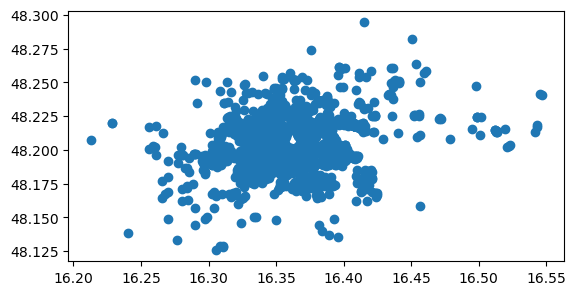

In [47]:
geo_vienaWD.plot()

In [62]:
map = folium.Map(location=[48.20, 16.35], tiles="OpenStreetMap", zoom_start=9)
map

In [48]:
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_vienaWD.geometry]

In [67]:
map = folium.Map(location=[48.20, 16.35], tiles="OpenStreetMap", zoom_start=9)
i = 0
for coordinates in geo_df_list[:878]:
    map.add_child(folium.Marker(location=coordinates,
                               popup="Price: "+ str(vienaWD.realSum[i])))
    i +=1
map